# Classification_성능평가지표

정확도가 있는데 왜 다른 평가지표도 사용하는가?  
=> 정확도는 불균형한 레이블 값 분포에서 사용할 시, 적합한 평가지표가 아니기 때문

![image](https://user-images.githubusercontent.com/70187490/128453966-c61ae49c-19a5-420c-a142-884154b7994f.png)

|지표|공식|의미|
|:-|:-|:-|
|정확도(Accuracy)| (TN + TP) / (TN + FP + FN + TP) |예측한 값이 실제값과 일치하는 비율|
|오류율(Error rate)| (FP + FN) / (TN + FP + FN + TP) |예측한 값이 실제값과 일치하지 않는 비율|
|정밀도(Precision)| TP / ( TP + FP ) |예측한 값 Positive 중에 Positive인 비율|
|민감도/재현율(Sensitivity or Recall)| TP / ( FN + TP ) |실제 값 Positive 중에 Positive로 예측한 비율|
|특이도(Specificty)| TN / ( TN + FP ) |실제 값 Negative중에 Negative로 예측한 비율|

## 오차행렬 / 정확도/  정밀도/ 민감도

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=156)

model = LogisticRegression(max_iter=32)
model.fit(X_train, y_train)
pred=model.predict(X_test)

confmat = confusion_matrix(y_test, pred)
confmat

array([[462,  24],
       [ 60, 454]], dtype=int64)

In [2]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def classifier_report(y_test, pred):

    print(classification_report(y_test, pred, target_names=['Class ' + str(i) for i in pd.unique(y_test)]))
    print('정확도:', np.round(accuracy_score(y_test, pred), 2))
    print('재현률:', np.round(recall_score(y_test, pred), 2))
    print('정밀도:', np.round(precision_score(y_test, pred), 2))
    
classifier_report(y_test, pred)

              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       486
     Class 1       0.95      0.88      0.92       514

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

정확도: 0.92
재현률: 0.88
정밀도: 0.95


## 오차 행렬 시각화

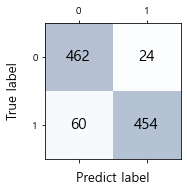

In [3]:
import matplotlib.pyplot as plt

def confu_mat_vi(confusion_matrix):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)

    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i, s=confusion_matrix[i,j], va='center', ha='center', fontdict={'fontsize':15})

    plt.xlabel('Predict label',fontdict={'fontsize':13}, labelpad=13)
    plt.ylabel('True label',fontdict={'fontsize':13}, labelpad=12)
    plt.show()

confu_mat_vi(confmat)

## 정밀도와 재현율의 관계
정확도는 때때로 좋은 평가지표가 아니기 때문에 다른 평가지표가 필요함  

재현율의 공식 = TP / (FN + TP)  
정밀도의 공식 = TP / (FP + TP)  

- 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점, 그러나
- 재현율은 FN(실제 Positive, 예측 Negative)을 낮추는데
- 정밀도는 FP(실제 Negative, 예측 Positive)을 낮추는데 초점

민감도(재현율)가 상대적으로 중요할 때: 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 암진단, 금융거래 사기를 판단할 경우  

정밀도가 상대적으로 중요할 때: 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 스팸메일 분류

## 정밀도와 재현율의 Trade off

분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있지만  
두 수치 모두를 함께 올릴 순 없음

사이킷런의 분류 알고리즘은 개별 레이블별로 결정 확률을 구하는데 이 결정확률을 조정하여  
정밀도와 재현율의 수치를 조정할 수 있음

              precision    recall  f1-score   support

     Class 0       0.87      0.96      0.91       486
     Class 1       0.96      0.87      0.91       514

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.92      0.91      0.91      1000

정확도: 0.91
재현률: 0.87
정밀도: 0.96


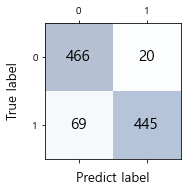

In [4]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임계값임
custom_threshold=0.56

# 모델을 통해 예측한 확률을 객체화한 뒤
pred_proba = model.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

binar_mat = confusion_matrix(y_test, custom_predict)


classifier_report(y_test, custom_predict)
confu_mat_vi(binar_mat)

## 정밀도와 재현율의 trade off 관계 시각화

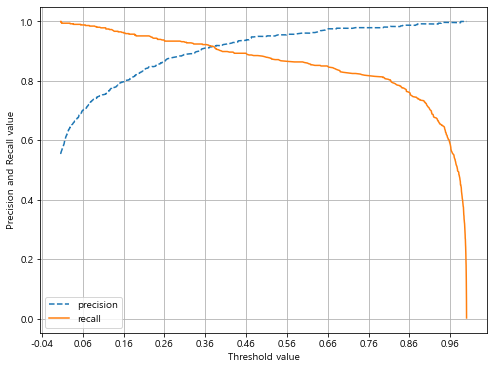

In [5]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    from sklearn.metrics import precision_recall_curve
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    # precision_recall_curve는 0.11~095 정도의 임계값과 그에 해당하는 정밀도 및 재현율 값을 담은 ndarray를 반환
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축과 y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, model.predict_proba(X_test)[:,1])

## F1 Score

정밀도가 100%가 되는 방법:  
- 확실한 기준이 되는 경우만 Positive로 예측하고 나머지를 모두 Negative로 예측

재현율이 100%가 되는 방법
- 모든 환자를 Positive로 예측

이러한 단점을 보완하여 F1 Score는 정밀도와 재현율을 결합하여 점수를 반환함  
어느쪽으로도 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

$$f1 = \frac{2}{\frac{1}{recall}+\frac{1}{precision}}=2 \times \frac{precision \times recall}{precision + recall}$$



In [6]:
from sklearn.metrics import f1_score

original_f1 = f1_score(y_test, pred)
print(np.round(original_f1, 2))

tunning_f1 = f1_score(custom_predict, pred)
print(np.round(tunning_f1, 2))

0.92
0.99


## ROC 곡선과 AUC
- ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
    - TPR는 재현율(TP / FN + TP)
    - FPR은 1-TNR(특이도 = TN / FP + TN)
    - ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며
    - 곡선이 가운데에서 멀어질 수록 성능이 뛰어난 모델
- ROC 곡선은 FPR을 0부터 1까지 변경(분류 결정 임곗값을 변경)하면서 TPR의 변화량을 구함

<br>

- AUC(Area Under Curve)값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치
- AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건

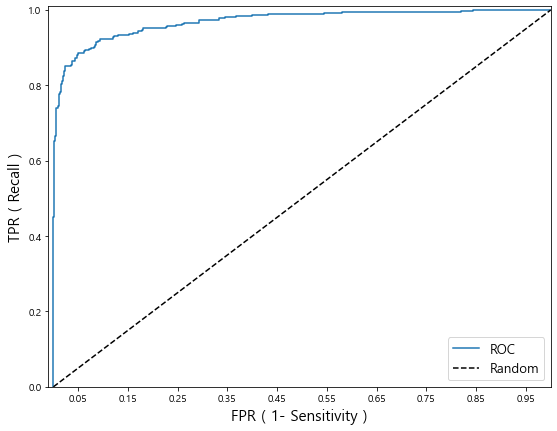

In [29]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test, pred_proba_c1):
    plt.figure(figsize=(9, 7))
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1)
    plt.ylim(0, 1.01)
    plt.xlabel('FPR ( 1- Sensitivity )', fontsize=15, labelpad=5)
    plt.ylabel('TPR ( Recall )', fontsize=15, labelpad=5)
    plt.legend(fontsize=13)
    
roc_curve_plot(y_test, pred_proba[:,1])